In [58]:
import tensorflow as tf
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict

def get_metrics(base_dir):
    paths = []
    for name in os.listdir(base_dir):
        if 'events.out' in name:
            p = os.path.join(base_dir, name)
            paths.append(p)
    paths = sorted(paths)
    metrics = defaultdict(list)
    for p in paths:
        for summary in summary_iterator(p):
            for value in summary.summary.value:
                if value.tag != "image":
                    metrics[value.tag].append(tf.io.decode_raw(value.tensor.tensor_content, value.tensor.dtype)[0].numpy())
    return metrics

In [73]:
m = get_metrics('/Users/dbahri/simclr/tf2/output_dir/rho2_metrics')

In [92]:
METRICS = {}

for rho, base_dir in [(0., '/Users/dbahri/simclr/tf2/output_dir/rho0_metrics'),
                  (0.05, '/Users/dbahri/simclr/tf2/output_dir/rho05_metrics_v2'),
                  (1., '/Users/dbahri/simclr/tf2/output_dir/rho1_metrics_v2'),
                  (2., '/Users/dbahri/simclr/tf2/output_dir/rho2_metrics_v2')
                 ]:
    METRICS[rho] = get_metrics(base_dir)

In [93]:
METRICS

{0.0: defaultdict(list,
             {'n_components_outs_95': [3.0,
               4.0,
               4.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               1.0,
               2.0,
               2.0,
               1.0,
               3.0,
               1.0,
               1.0,
               1.0,
               2.0,
               3.0,
               1.0,
               2.0,
               1.0,
               3.0,
               2.0,
               2.0,
               1.0,
               2.0,
               2.0,
               2.0,
               3.0,
               3.0,
               1.0,
               2.0,
               2.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               3.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               2.0,
               1.0,
               3.0,
            

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

for rho in [0., 0.05, 1., 2.]:
    x = np.array(METRICS[rho]['train/sam_loss'])
    plt.plot(x, label=str(rho))
plt.title('simclr pretraining loss')
plt.xlabel('cifar10 epoch')
plt.legend()
plt.show()

In [27]:
# METRICS = {}

# for rho, base_dir in [(0., '/Users/dbahri/simclr/tf2/output_dir/v1_rho0'),
#                   (0.05, '/Users/dbahri/simclr/tf2/output_dir/v1_rho05'),
#                   (1., '/Users/dbahri/simclr/tf2/output_dir/v1_rho1'),
#                   (2., '/Users/dbahri/simclr/tf2/output_dir/v1_rho2')
#                  ]:
#     METRICS[rho] = get_metrics(base_dir)

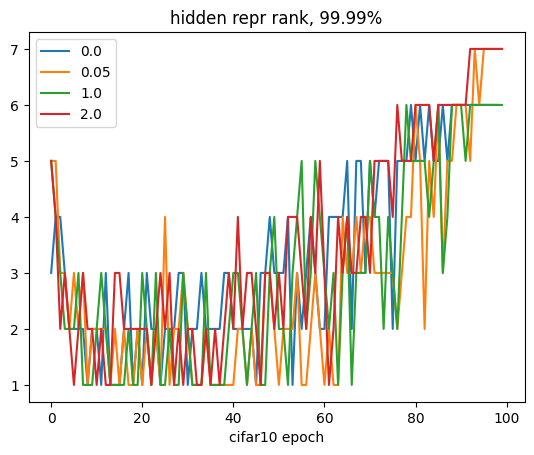

In [101]:
import numpy as np
from matplotlib import pyplot as plt

for rho in [0., 0.05, 1., 2.]:
    x = np.array(METRICS[rho]['n_components_outs_99.'])
    plt.plot(x, label=str(rho))
plt.title('hidden repr rank, 99.99%')
plt.xlabel('cifar10 epoch')
plt.legend()
plt.show()
